<font color="green"><h2> **Welcome to ABT/HYD 182**


 ## **Lab 8**: Raster Data Analysis & Zonal Statistics

### **Due Date: March 4 | 11:59 PM**
------------------------------------------------------------------------------

## Academic Integrity Statement

**This work was completed without the use of Generative AI tools (such as ChatGPT, Copilot, etc.).**

By completing the information below, you certify that you have completed this assignment independently and without the assistance of generative AI tools. This tutorial is designed to help you learn Python programming fundamentals through hands-on practice.

---

**Note:** If you did use a generative AI tool, you must clearly disclose this in your notebook, including which tool you used and how you used it (e.g., debugging, understanding error messages, or clarifying concepts). Failure to disclose the use of generative AI tools may be considered a violation of course academic integrity policies.

In [ ]:
# Enter your information below
your_name = ""  # Replace with your full name
date = ""       # Replace with today's date (e.g., "January 7, 2026")

# Print your statement
print("Academic Integrity Statement")
print("=" * 50)
print(f"Name: {your_name}")
print(f"Date: {date}")
print("=" * 50)
print("I certify that this work was completed without the use of Generative AI tools.")

# Table of Contents

  * [Exercise 1](#section1)
  * [Exercise 2](#section2)
  * [Exercise 3](#section3)
  * [Exercise 4](#section4)
  * [Exercise 5](#section5)
  * [Exercise 6](#section6)
  * [Exercise 7](#section7)
  * [Exercise 8](#section8)

---
**Learning objectives**
* You will learn and practice

    * Read and visualize raster data (multispectral image)
    * Visualize shapefile on top of raster file    
    * Calculate spectral vegetation indices (e.g., NDVI)  
    * Segment object of interest from backgrounds in an image  
    * Perform zonal statistics   
---

---
**Goal**

The goal is to examine if we can predict nitrogen concentration for each vine using UAV-based aerial multispectral images.

Low N limits vine vigor and yield. On the other hand, unnecessary application of N fertilizers needlessly increases production costs, may cause unintended nutrient imbalances, and contributes to environmental contamination (from https://doi.org/10.3390/rs12213515).

---


### Download the datasets








* #### Image (raster file)

We will be working on the same multispectral image you worked on for lab 3 (week 3). You can download the image from Box at:
https://ucdavis.box.com/s/a5s6ob31fmq349z37o2t2bftptgdaurz

The dataset includes a multispectral image captured from a vineyard by a RedEdge 3 camera system (MicaSense, Inc., Seattle, WA, USA), which simultaneously captures five discrete spectral bands, including blue, green, red, red edge, and near-infrared, and saved as 16-Bit TIFF. The multispectral camera system was mounted on the dual downward gimbal mount of DJI Matrice 210 (Shenzhen, China) UAV using a 3D-printed mounting bracket. The images were captured around solar noon with clear sky conditions. These images have been pre-processed. The pre-processing steps includes radiometric calibration, unwarping, stacking and alignment of bands, and cropping each image to the common frame among all five bands.
The dataset is part of a study conducted by the [Digital Agriculture lab](https://digitalag.ucdavis.edu/) and Kearney Agricultural Research and Extension Center, and published in Remote Sensing Journal (https://doi.org/10.3390/rs12213515).

The  table below shows the center and bandwidth for each band.

| bands | center wavelength (nm) | bandwidth (nm) |
| ---   | ----              | ---       |
|blue | 475 | 20|
|green|560| 20|
|red| 668|10|
|red edge| 717|10|
|near-infrared|840|40|

* #### Shapefile (vector file)

You can download the shapefile from Canvas or Box at: https://ucdavis.box.com/s/a5s6ob31fmq349z37o2t2bftptgdaurz

Please check `Flame_Selma_Map.pdf` file, showing the layout of the plots and treatments. You may want to rotate the table 90 degrees clockwise (north facing up) to match with your QGIS or ArcGIS map Pro (right click on the pdf page => click on ‘Rotate Clockwise’).
Open “selma_bloom_plots.shp” file in QGIS or ArcGIS Pro from selma_bloom_plots folder.

   * `T_ID`: a unique number to identify each tree in the entire vineyard.
   * `plot`: unique plot ID, ranging from 1 to 30.
   * `vine`: vine ID in each plot, starting from North and ranging from 1 to 5.
   * `treatment`: N treatment at three levels 0X (0 g/vine), 1X (19.2 g/vine) and 2.5X (48 g/vine).
   * `applic`: it refers to the two levels of split applications (2 versus 10 applications/season).
   * `nitrogen`: N concentration measured at bloom stage through the tissue sampling process.

  The experimental site is a commercial table grape vineyard near Kingsburg, CA. In this study, there are three levels of nitrogen (N) treatment (0, 19.2, or 48 g/vine), two levels of split applications (2 versus 10 applications/season), and five replications with a split-plot design. Therefore, we have 30 plots (3 levels of N × 2 split application treatments × 5 replications), each with five individual vines, resulting in a study with 150 vines. At the bloom stage, nitrogen  concentration of each vine was measured through tissue sampling.


---

### Reading the multispectral image

Here is the instruction on how to open a raster file (similar to week 3).

* Once your Google Drive is mounted, from the left panel (Files > myGdrive) navigate to the folder you saved the multispectral image. Right click on the image and copy the path (right click > Copy path). If you need more instruction, please check [THIS](https://medium.com/ml-book/simplest-way-to-open-files-from-google-drive-in-google-colab-fae14810674).

* Define a variable called image_path and assign the path you copied to it.
* Note that the path is a string and therefore it should be inside a quotation.
* Note: if you want to do the assignment in PyCharm or Visual Studio Code, we need to use letter `r`, which stands for raw, before the path to make backslashes in the string path be interpreted as actual backsplashes and not as python special characters.
```python

        # example

        # Google colab:
        image_path = "/content/myGdrive/MyDrive/ABT182/multispectral_image.tif"

        # VS Code or PyCharm:
        image_path = r'G:\My Drive\ABT182\multispectral_image.tif'

        #Pay attention to the difference in slash and backslash.
```
* Open the multispectral image using rasterio. hint: use '`open()` function of rasterio to open the file as a rasterio object. You can find an example of how to open and read a file [here](https://rasterio.readthedocs.io/en/latest/topics/reading.html). Please note that `open()` method returns an object (not an image).

* Now read the image as a numpy array (matrix). Hint: use `read()` to  read the multispectral image as a numpy array and assign it to a variable called `image_array`.

Please note that we want to read all bands (5 bands) of the multispectral image into a 3-dimensional ndarray.

What is the size of the image_array? Hint: use `shape` to find the size of an array. Note that image_array is a 3-dimensional ndarray and interpretation of the 3 axes is (bands, rows, columns). We will transpose it to a regular order (rows, columns, bands) later.

In [ ]:
# to install rasterio, run this cell.
!pip install rasterio

# installing geopandas
! pip install geopandas

---
<a name = "section14"></a>
Import packages
---

Here we will import the required packages for this assignment.
Once you installed geopandas, you can import it. Please import other required packages like `numpy` and `matplotlib.pyplot`.

```python
import rasterio
# import rasterio as rio         # the short version
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import reshape_as_image
```

In [5]:
# here we import the packages (libraries) we need for this assignment

import rasterio
# import rasterio as rio         # the short version
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import reshape_as_image


---
<a name = "section15"></a>
Mount Google Drive
---

Similar to our previous labs, we should mount our Google Drive to Colab to access (open and save) our files.

```python
# Run this cell to let the notebook have access to your Google Drive.
from google.colab import drive
drive.mount('/content/myGdrive')
```

In [6]:
# Run this cell to let the notebook have access to your Google Drive.
from google.colab import drive
drive.mount('/content/myGdrive')

Mounted at /content/myGdrive


---
<a name = "section1"></a>
**Exercise 1**
---

Write a code that
- reads the multispectral image
- prints
    - The image array shape to know the number of rows, columns, and bands
    - Coordinate reference system (CRS) of the image
    - Bounding box, defining the extent in cartesian coordinates
    - Image metadata
    - Raster dataset profiles
    - Affine transform


In [7]:
# here we load/open the multispectral image

# image_path = '/PATH_to_image/multispectral_image.tif'
image_path = '/content/myGdrive/MyDrive/Colab Notebooks/Labs_2024/Week8/ABT182_zonal_statistics/multispectral_image.tif'

image_rio = rasterio.open(image_path)                      # hint: use 'open()' function of rasterio to read the file a rasterio object
image_array = image_rio.read()    # hint: use 'read()' to  read the multispectral image as a numpy array.

# what is the size of the image_array? Hint: use 'shape' to find the size of an array.
print(image_array.shape)

(5, 3467, 2917)


In [8]:
# write your code here

im_info = {}
im_info["im_crs"] = image_rio.crs                    # coordinate reference system (CRS) of the image
im_info["im_bounds"] = image_rio.bounds              # Bounding box named tuple, defining extent in cartesian coordinates.
im_info["im_meta"] = image_rio.meta                  # image metadata
im_info["im_profile"] = image_rio.profile            # Raster dataset profiles
im_info["im_transform"] = image_rio.transform        # affine tranform

for key in im_info.keys():
    print(f"\n{key}")
    print(f"{im_info[key]}")



im_crs
EPSG:32611

im_bounds
BoundingBox(left=269879.183, bottom=4046995.9311, right=270027.95, top=4047172.7481)

im_meta
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -10000.0, 'width': 2917, 'height': 3467, 'count': 5, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'), 'transform': Affine(0.05099999999999744, 0.0, 269879.183,
       0.0, -0.050999999999944125, 4047172.7481)}

im_profile
{'driver': 'GTiff', 'dtype': 

------------------------------
<a name = "section2"></a>
**Exercise 2**
------------------------------

#### Assign a name to each band

Write a code that

- transposes the image array
   * We need to transpose the image array (image_array) to m (row) by n (col) by b (bands) image, which is a format expected by most other software and packages, like matplotlib.

   * To change the axis order, we will use `reshape_as_image()` method from rasterio.

   * You can find more information and an example [here](https://rasterio.readthedocs.io/en/latest/topics/image_processing.html#imageorder).

   * Assign the transposed image (row, col, bands) to a variable called `image`.

* Prints the size (shape) of the variable image to check if it is now in the form of row, column, and bands.

* Defines variables called blue, green, red, rededge, nir and assign a single band to each of them. The multispectral image has five bands (blue, green, red, red edge, and NIR).

Please note python indexing starts at zero! So the index of the first band (blue) is zero.

Please check [this page](https://www.w3schools.com/python/numpy/numpy_array_slicing.asp) to learn about numpy array slicing and indexing.

Example:
```python
        blue = image[:,:,0] # all the rows and columns of the first band (index 0) is assigned to blue band.
```



* Displays the bands using gray colormap and assigns the band name as the figure  title
Hint: you may use a for loop to slice one band of the image at each iteration and loop through a list containing the band names and use it as the figure title.


* Creates an image with three bands: red, green, and blue (RGB image).
        * RGB image consists of red, green, and blue bands. Therefore, you need to stack these three bands in z (spectral) direction.
        Hint: you may use `np.dstack()` to stack three bands in z direction or alternatively, you may slice the origial multispectral image to create RGB image.

* Displays the RGB image (write a code to visualize it).

In [9]:
# reading multispectral image and transposing it
image = reshape_as_image(image_array)

print('\noriginal image shape:{}'.format(image_array.shape))
print('\nimage shape after tranpose:{}'.format(image.shape))  # it prints the size of the image (matrix) as number of rows, number of columns, and number of bands


original image shape:(5, 3467, 2917)

image shape after tranpose:(3467, 2917, 5)


In [10]:
# assign each layer of the 3D ndarray to a multispectral band. Since we know the order of bands, then

blue = image[:,:,0] # BLUE band
green = image[:,:,1] # GREEN band
red = image[:,:,2] # RED band
rededge = image[:,:,3] # RED-EDGE band
nir = image[:,:,4] # Near-INFRARED band

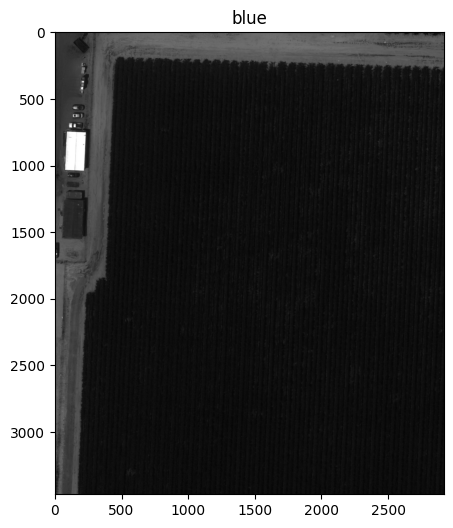

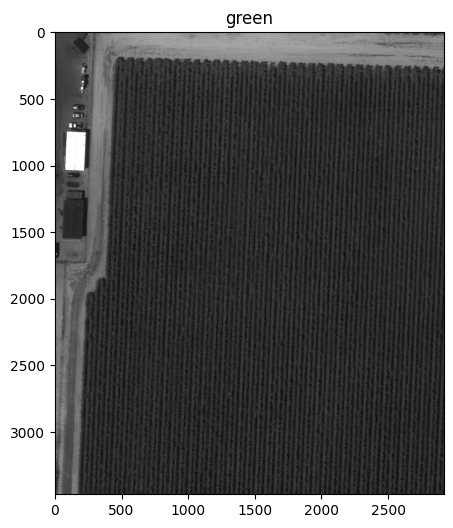

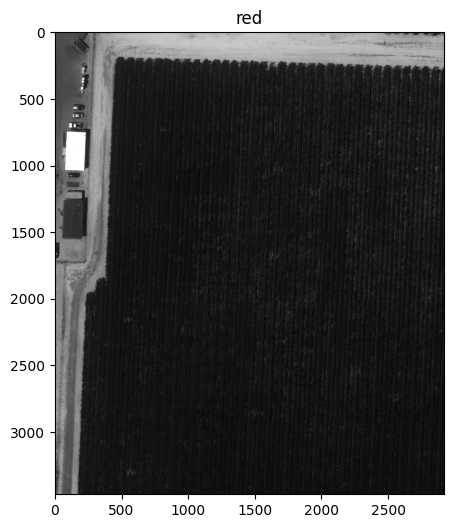

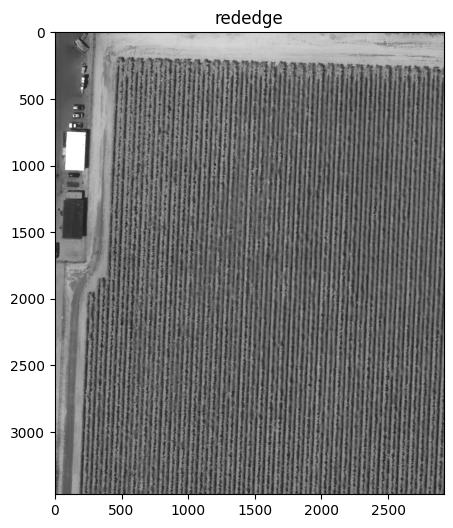

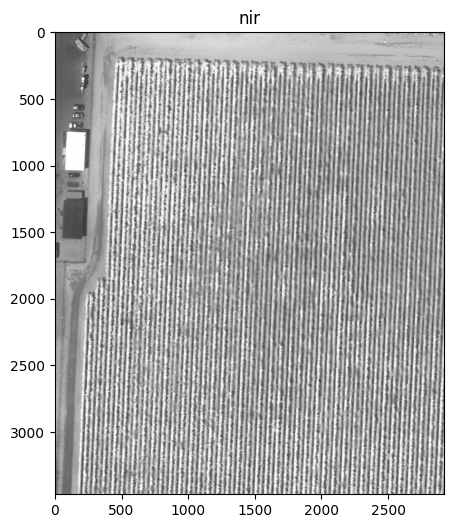

In [8]:
# visualization of all bands
title_list = ['blue', 'green', 'red', 'rededge', 'nir']

for band in range (5):          # we know it has five bands

    plt.figure(figsize=(8, 6), dpi=100)
    plt.imshow(image[:,:,band], cmap='gray', clim=(0.0, 0.6)) # you can use other colormaps cmap='Spectral', cmap='summer'
    plt.title(title_list[band])
    plt.show()


image size:(3467, 2917, 3)




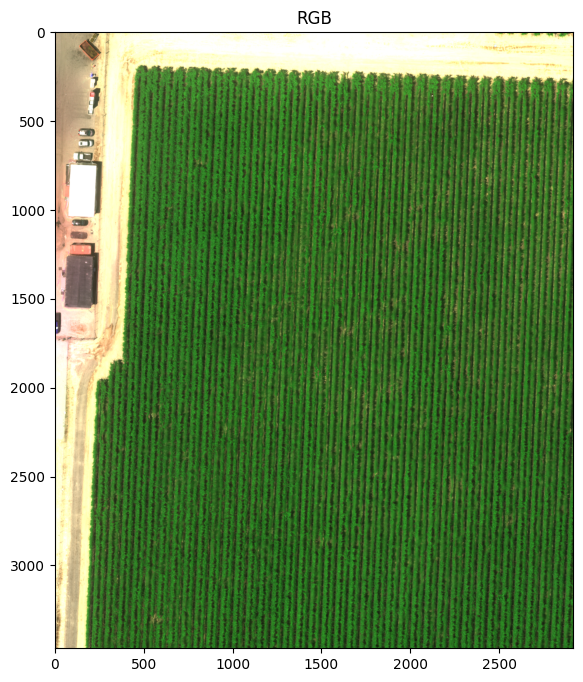

In [11]:
# Create an RGB image
rgb = np.dstack((red, green, blue))   # stacking three bands (matrix) in z direction
print('\nimage size:{}'.format(rgb.shape))
print('\n')

plt.figure(figsize=(10, 8), dpi=100)
plt.imshow(rgb*4) # multiply by 4 to enhence the contrast
plt.title('RGB')
plt.show()

--------------------------------------------
<a name = "section3"></a>
**Exercise 3**
--------------------------------------------

#### Reading the shapefile


* Read the shapefile. Here is the instruction on how to open a shapefile using geopandas similar to previous labs:

    * Install geopandas, if needed.  
    * Once your Google Drive is mounted, from the left panel (Files > myGdrive) navigate to the folder you saved the dataset. Right click on the shapefile (selma_bloom_plots.shp) and copy the path (right click > Copy path). If you need more instruction, please check [HERE](https://medium.com/ml-book/simplest-way-to-open-files-from-google-drive-in-google-colab-fae14810674).

    * Define a variable called `shp_path` and assign the path you copied to it.
    * Note the path is a string, and therefore, it should be inside a quotation.
    * Now, read the shapefile using geopandas which was imported as gpd. The function to read files is `read_file()`.

     You can find an example on how to read a file with geopandas here: https://geopandas.org/en/stable/docs/user_guide/io.html

    * Please note that we have already imported geopandas as gpd in the above cells.
    * Another example of how to use geopandas can be found [HERE](https://geopandas.org/en/stable/docs/user_guide/data_structures.html).


* Once shapefile is loaded, use `head()` method to check the first 5 rows of the dataframe.

* Plot the shapefile using a colormap (like `viridis` or `Set1`) to display the variation for the following columns:
    - "treatment"
    - "nitrogen"

* Check if the multispectral image and shapefiles are in the same CRS.
Hint: check if `image_rio.crs == df.crs`. If it is `True`, then they are in the same CRS. You may use `assert()`.
    - The assert keyword is used when debugging code.
    - The assert keyword lets you test if a condition in your code returns True, if not, the program will raise an AssertionError.
    - Resource: https://www.w3schools.com/python/ref_keyword_assert.asp


```python
err_msg = 'multispectral image and shapefiles should be in the same CRS!'
assert image_rio.crs == df.crs, err_msg
```

In [12]:
shp_path = '/content/myGdrive/MyDrive/Colab Notebooks/Labs_2024/Week8/ABT182_zonal_statistics/selma_bloom_plots/selma_bloom_plots.shp'
# shp_path = r'week_8\selma_bloom_plots\selma_bloom_plots.shp'
gdf = gpd.read_file(shp_path)

print(gdf.head())
print(gdf.info())

   T_ID  plot  vine treatment  applic  nitrogen  \
0     3   6.0   1.0        0X    10.0      2.74   
1     4   6.0   2.0        0X    10.0      3.19   
2     5   6.0   3.0        0X    10.0      2.98   
3     6   6.0   4.0        0X    10.0      3.06   
4     7   6.0   5.0        0X    10.0      3.02   

                                            geometry  
0  POLYGON ((269988.857 4047155.232, 269988.78 40...  
1  POLYGON ((269988.78 4047153.405, 269988.703 40...  
2  POLYGON ((269988.703 4047151.578, 269988.625 4...  
3  POLYGON ((269988.625 4047149.751, 269988.548 4...  
4  POLYGON ((269988.548 4047147.924, 269988.471 4...  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   T_ID       150 non-null    int64   
 1   plot       150 non-null    float64 
 2   vine       150 non-null    float64 
 3   treatment  150 non-null    object  
 4   

<Axes: >

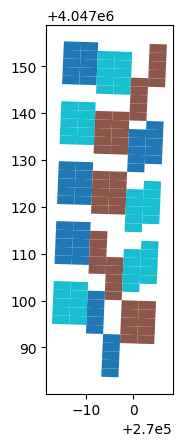

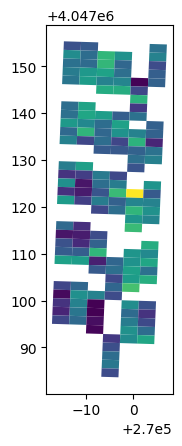

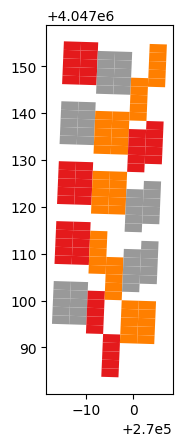

In [13]:
# visualization of df
gdf.plot(column='treatment')

gdf.plot(column='nitrogen')

gdf.plot(column='treatment', cmap='Set1')

In [12]:
# check if the multispectral image and shapefiles are in the same CRS.

err_msg = 'multispectral image and shapefiles should be in the same CRS!'
assert image_rio.crs == gdf.crs, err_msg

In [13]:
# image CRS
print(image_rio.crs)

EPSG:32611


In [14]:
# shapefile CRS
print(gdf.crs)

EPSG:32611


---

--------------------
<a name = "section4"></a>
**Exercise 4**
-------------------

#### Visualization of raster and shapefile

* Write a code to visualize polygons on top of the near-infrared band `nir`

    * Use `plt.figure(figsize=(10, 10))`  to create a new figure for plotting with a specified size (10x10 inches).
    * Plot the rgb image. Please note the rgb image is a numpy array without coordinate system. You need to pass the extent of the extent parameters of the image to ensure the image is plotted according to its real-world spatial extent.
    `plt.imshow(image_data, extent=extent)`.
      - How to find the extent?
      `bounds = src.bounds`: returns the spatial bounds of the image, which are used to determine the spatial extent of the image in the plot.
      Then, you need to create a list representing the spatial extent of the image, required for correctly placing the image in the plot's coordinate system. `extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]`

    * To overlay the vector data from the GeoDataFrame (gdf) onto the current axes, we should pass the axis of the image plot (`plt.figure()`) to `gdf.plot()`.  
    `gdf.plot(ax=plt.gca(), .... )` add other arguments like column and cmap.
      Instead of using colormap and a column, you can plot the shapefile data with no fill (facecolor='none') and red edges (edgecolor='red'), making it visible against the rgb image background. It's crucial that the GeoDataFrame and the image data are in the same Coordinate Reference System (CRS) for them to align correctly on the plot.

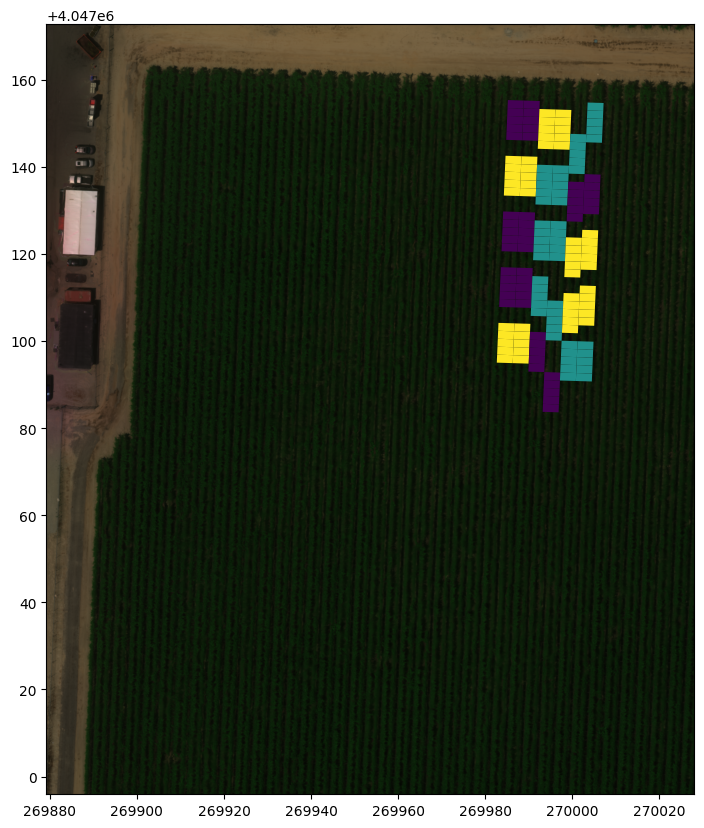

In [14]:
# Plot the image
bounds = image_rio.bounds
extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]

plt.figure(figsize=(10, 10))
plt.imshow(rgb, extent=extent)
# Overlay the GeoDataFrame
# Ensure the GeoDataFrame is in the same CRS as the image

gdf.plot(column='treatment', ax=plt.gca(), cmap = 'viridis')
# or
# gdf.plot(column='treatment', ax=plt.gca(), facecolor='none', edgecolor='red')

plt.show()

------------------
<a name = "section5"></a>
**Exercise 5**
----------------

Spectral indices are computed by arithmetic operation on pixels of the bands of a raster dataset.

Spectral indices are mainly used to:



*   To enhance or reveal latent information from spectral images
*   To study the biophysical phenomenon of objects, mainly vegetation, using the object's spectral responses in a few bands.
*   To segment our object of interest from the backgrounds.

### EXAMPLE:
##### 1- *Normalized Difference Vegetation Index (NDVI)*
> ##### $NDVI = \frac{(nir - red)}{(nir + red)}$

##### 2- *Normalized Difference Red Edge Index (NDRE)*
> ##### $NDRE = \frac{(nir - rededge)}{(nir + rededge)}$


* Using these equations, write a code to create NDVI and NDRE from our multispectral bands.

* Display the two spectral indices you created. Please note these are gray scale image so use cmap='gray'.  

* In which spectral index canopy (vegetation) are more distinct from the background?

In [18]:
# write your code here (5 points)
ndvi = (nir - red) / (nir + red)

ndre = (nir - rededge) / (nir + rededge)



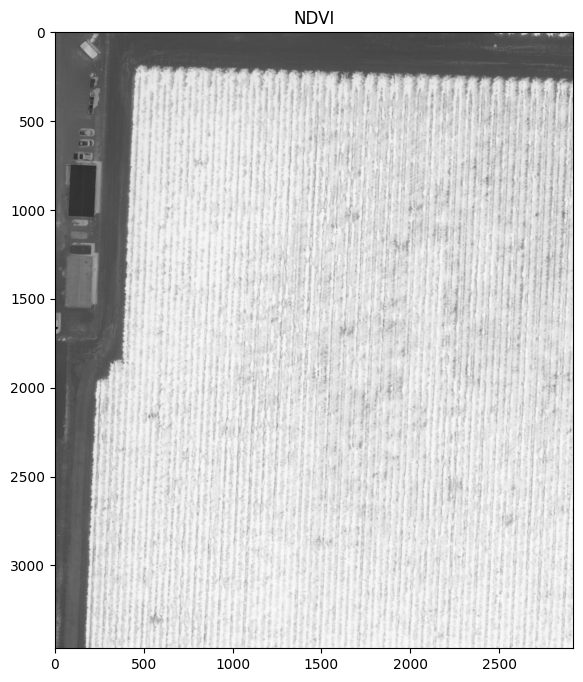

In [19]:
# plot NDVI image, which is a gray scale image (5 points)
plt.figure(figsize=(10, 8), dpi=100)
plt.imshow(ndvi, cmap='gray')
plt.title('NDVI')
plt.show()


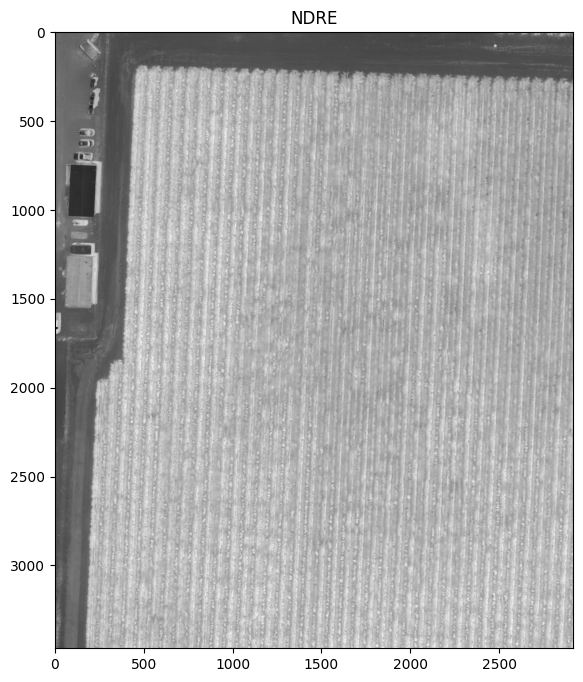

In [17]:
# plot NDRE image, which is a gray scale image (it has only one band) (5 points)
plt.figure(figsize=(10, 8), dpi=100)
plt.imshow(ndre, cmap='gray')
plt.title('NDRE')
plt.show()

------
<a name = "section6"></a>
**Exercise 6**
------

#### Segmentation of vegetation from backgrounds using spectral indices

Part A.

* Here we use NDVI to segment canopy from the backgrounds

* First, let's  check the histogram of pixel values for NDVI
* Based on the histogram, select a threshold to segment pixels representing vegetations from backgrounds.
* This is a binomial distribution. We know vegetation pixels have a larger ndvi values (in ndvi image, vegetation pixels were brighter because they have a larger values). So the right pick in the histogram most probably represents vegetation and the left one represents backgrounds.
* Let's keep all the pixels that have a pixel values larger than 0.6 and mask out the rest of the pixels as they represent backgrounds. Please feel free to change the threshold.
    * first, we need to create a binary mask: `mask = ndvi > ndvi_threshold`
    * plot this mask.
* Write a code to segment vegetation pixels in ndvi image using this mask
HINT: you should multiply the binary mask (which is zero and one) to ndvi image. Background pixels will become all zero as they are multiplied by zero, and vegetation pixels are segmented (remain intact) as they are multiplied by one.
* Plot the masked ndvi image.

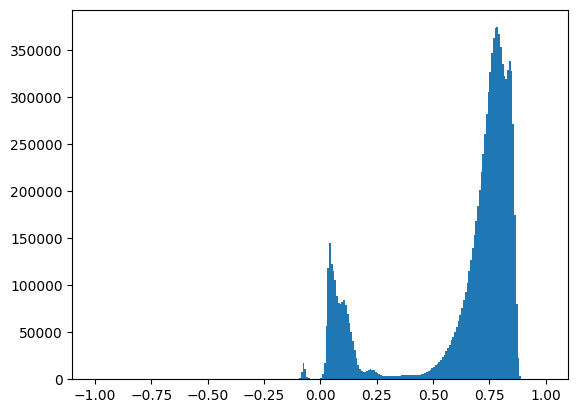

In [20]:
# ndvi histogram
hist_ndvi = plt.hist(ndvi.ravel(), bins=256, range=(-1,1))


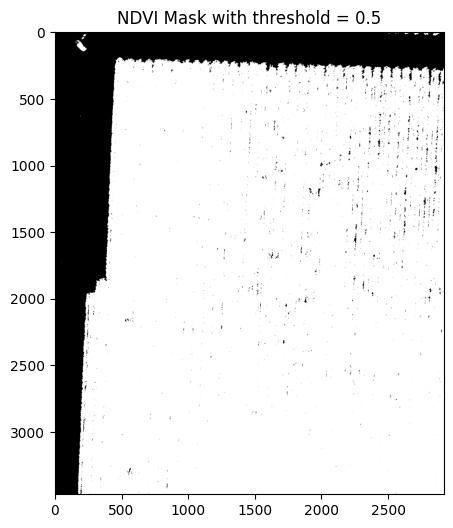

In [21]:
# write your code here.

ndvi_threshold = 0.5       # feel free to play with the threshold value
mask = ndvi > ndvi_threshold # it creates a binary image

plt.figure(figsize=(8, 6))
plt.imshow(mask, cmap='gray')
plt.title('NDVI Mask with threshold = ' + str(ndvi_threshold))
plt.show()

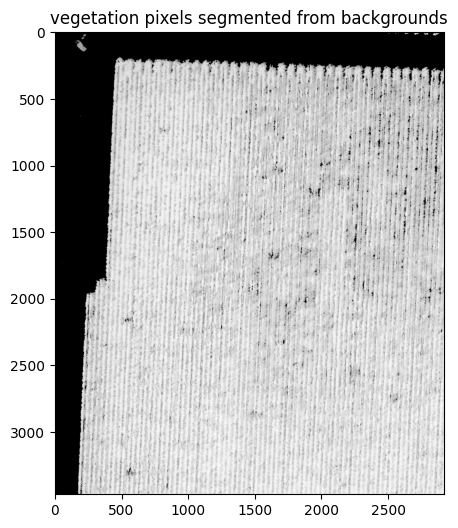

In [22]:
# write your code here to segment vegetation in ndvi image (5 points)
ndvi_masked = ndvi * mask

# write your code here to visualize the masked ndvi image
plt.figure(figsize=(8, 6))
plt.imshow(ndvi_masked, cmap='gray')
plt.title('vegetation pixels segmented from backgrounds')
plt.show()

Part B.
* Write your code here to segment vegetation in RGB image created above.

HINT: RGB image has three bands but mask has one band. Therefore, you need to create a 3D mask (3D matrix) for pixel-wise multiplication. Then multiply your RGB image to the 3D mask. For matrix multiplication, both matrices should have the same size (number of rows, columns, and bands should be identical).

* Plot the masked RGB image.

In [23]:

# write your code here

mask_3d = np.dstack([mask]*3) # stack the binary mask 3 times in z dimention

segmented_canopy = mask_3d * rgb # pixel wise multiplication

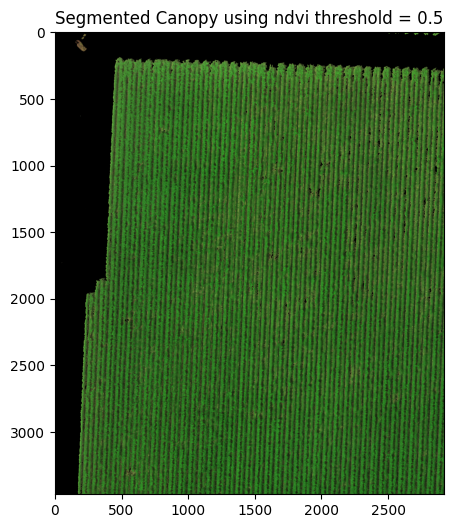

In [24]:
# write your code here to visualize the masked RGB image (5 points)
plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(segmented_canopy*4, cmap='gray')
plt.title('Segmented Canopy using ndvi threshold = ' + str(ndvi_threshold))
plt.show()

----
<a name = "section7"></a>
**Exercise 7**
----

#### Zonal statistics

`rasterstats` is a Python module for summarizing geospatial raster datasets based on vector geometries. It includes functions for zonal statistics and interpolated point queries.
[source](https://pythonhosted.org/rasterstats/)

* `rasterstats`is used to extract information from geospatial raster data based on vector geometries.

Primarily, this involves zonal statistics: a method of summarizing and aggregating the raster values intersecting a vector geometry. For example, zonal statistics provide answers such as the mean precipitation or maximum elevation of an administrative unit. In addition, functions are provided for point queries, such as the ability to query a raster at a point and get an interpolated value rather than the simple nearest pixel. [source](https://pythonhosted.org/rasterstats/manual.html#introduction)


* We need `zonal_stats()` from `rasterstats` library. Learn more about the

https://pythonhosted.org/rasterstats/manual.html#introduction

https://pythonhosted.org/rasterstats/rasterstats.html?highlight=zonal_stats#rasterstats.zonal_stats

* Learn more about the input and output of `zonal_stats`:
https://pythonhosted.org/rasterstats/_modules/rasterstats/main.html#zonal_stats

Part A.
* Write a code to calculate min, max, median, and sum for each zone (polygons overlaid on image) of NDVI and NDRE image.

    * Please note NDVI and NDRE are numpy array without src. Therefore, we should pass `affine` as one of the inputs for `zonal_stats()`.
    
        [affine: Affine instance](https://pythonhosted.org/rasterstats/rasterstats.html?highlight=zonal_stats#rasterstats.zonal_stats)
        is required only for ndarrays, otherwise it is read from src

    * What if a polygon only covers a portion of a pixel? We can set `all_touched` argument to include every raster cell touched by a geometry, or only those having a center point within the polygon. Default value is set to `False`.

    * `zonal_stats()` returns a list. Each item corresponds to a single vector feature and contains keys for each of the specified stats (min, max, median, and sum). Print the output of `zonal_stats()` to learn about its output format. We would like to convert this to a pandas dataframe.

    ``` python
    # ndvi_stats is the output of the zonal_stats
    df_ndvi_stats = pd.DataFrame(ndvi_stats)
    df_ndvi_stats.head()
    ```


In [1]:
# install rasterstats
! pip install rasterstats

In [25]:
from rasterstats import zonal_stats
import pandas as pd

In [26]:
# running zonal_stats might give you some warnings about no data pixels
# here we import a library to ignore those warnings otherwise it will print warnings
import warnings
warnings.filterwarnings('ignore')

In [27]:
# write your code here for zonal statistics of ndvi
stats=['min', 'max', 'median', 'sum']

ndvi_stats = zonal_stats(gdf, ndvi,
                        affine=image_rio.transform,
                        stats=stats,
                        all_touched=False
                        )

df_ndvi_stats = pd.DataFrame(ndvi_stats)
# ndvi_columns=[item + "_ndvi" for item in stats]
# df_ndvi_stats.columns = ndvi_columns
df_ndvi_stats.head()

min       max          sum    median
0  0.059915  0.816617  1732.857666  0.682329
1  0.454898  0.833801  1813.692261  0.714142
2  0.397332  0.832659  1734.864990  0.678489
3  0.453200  0.836358  1826.852051  0.709349
4  0.429889  0.850591  1899.140015  0.751029

In [28]:
print(ndvi_stats)

[{'min': 0.059914737939834595, 'max': 0.8166173696517944, 'sum': 1732.857666015625, 'median': 0.6823290586471558}, {'min': 0.45489829778671265, 'max': 0.8338009119033813, 'sum': 1813.6922607421875, 'median': 0.7141417860984802}, {'min': 0.3973318636417389, 'max': 0.8326588273048401, 'sum': 1734.864990234375, 'median': 0.6784887909889221}, {'min': 0.4531995952129364, 'max': 0.8363580107688904, 'sum': 1826.85205078125, 'median': 0.7093492746353149}, {'min': 0.4298887848854065, 'max': 0.8505905270576477, 'sum': 1899.1400146484375, 'median': 0.7510288953781128}, {'min': 0.46687984466552734, 'max': 0.848760187625885, 'sum': 1880.2396240234375, 'median': 0.7443414926528931}, {'min': 0.455348402261734, 'max': 0.8460639715194702, 'sum': 1919.1580810546875, 'median': 0.7456986904144287}, {'min': 0.4624446630477905, 'max': 0.8632426261901855, 'sum': 1907.89404296875, 'median': 0.7428200840950012}, {'min': 0.4726099371910095, 'max': 0.8504816293716431, 'sum': 1894.891845703125, 'median': 0.749308

In [29]:
# write your code here for zonal statistics of ndre
ndre_stats = zonal_stats(gdf, ndre,
                        affine=image_rio.transform,
                        stats=stats,
                        all_touched=False
                        )

df_ndre_stats = pd.DataFrame(ndre_stats)

# ndre_columns=[item + "_ndre" for item in stats]
# df_ndre_stats.columns = ndre_columns
df_ndre_stats.head()

min       max         sum    median
0  0.028433  0.321136  541.693665  0.207794
1  0.148800  0.308171  558.790466  0.211793
2  0.159176  0.301699  572.685791  0.222563
3  0.148004  0.326177  596.387817  0.225632
4  0.162006  0.362484  637.305908  0.245667

Part B.

* Now merge the df containing zonal stats data with our original gdf (shapefile)

* We already did this in our previous assignments. You can use `pd.merge()`. Merge the dataframes on index (row number). Therefore, you need to pass these two arguments: left_index=True and left_index=True to `pd.merge()`.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

```python
# for instance
df_ndvi = pd.merge(gdf, df_ndvi_stats, how='left', left_index=True, right_index=True)
```

* Do the same thing for ndre stats.

In [30]:
# frist, let's check if the index for both dataframe is identical
assert (gdf.index == df_ndvi_stats.index).all(), "Indexes do not match."

# or
gdf.index == df_ndvi_stats.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [31]:
# write your code here

df_ndvi = pd.merge(gdf, df_ndvi_stats, how='left', left_index=True, right_index=True)
df_ndvi.head()

df_ndre = pd.merge(gdf, df_ndre_stats, how='left', left_index=True, right_index=True)
df_ndre.head()

T_ID  plot  vine treatment  applic  nitrogen  \
0     3   6.0   1.0        0X    10.0      2.74   
1     4   6.0   2.0        0X    10.0      3.19   
2     5   6.0   3.0        0X    10.0      2.98   
3     6   6.0   4.0        0X    10.0      3.06   
4     7   6.0   5.0        0X    10.0      3.02   

                                            geometry       min       max  \
0  POLYGON ((269988.857 4047155.232, 269988.78 40...  0.028433  0.321136   
1  POLYGON ((269988.78 4047153.405, 269988.703 40...  0.148800  0.308171   
2  POLYGON ((269988.703 4047151.578, 269988.625 4...  0.159176  0.301699   
3  POLYGON ((269988.625 4047149.751, 269988.548 4...  0.148004  0.326177   
4  POLYGON ((269988.548 4047147.924, 269988.471 4...  0.162006  0.362484   

          sum    median  
0  541.693665  0.207794  
1  558.790466  0.211793  
2  572.685791  0.222563  
3  596.387817  0.225632  
4  637.305908  0.245667

----
<a name = "section8"></a>
**Exercise 8**
----

* Calculate the correlation between `median` of ndvi and measured nitrogen and also between ndre and measured nitrogen.

* example:

https://www.geeksforgeeks.org/how-to-calculate-correlation-between-two-columns-in-pandas/

Q1- If we want to predict the nitrogen concentration from UAV-based multispectral images, which spectral index would be a good predictor variable? (which one has a higher correlation with nitrogen concentration?)




---


Write your response in this cell



---




In [33]:
# write your code here to calculate the correlation and print them (5 points)
ndvi_corr = df_ndvi['nitrogen'].corr(df_ndvi['median'])
ndre_corr = df_ndre['nitrogen'].corr(df_ndre['median'])
print(ndvi_corr)
print(ndre_corr)

0.2761523876327943
0.6731881478093568


### Demo:

* Here we write a code to plot measured nitrogen (on x axis) and NDRE median on y axis.

* We use scatter plot

https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html

* We would like to assign a color to each point based on the treatment. However, our treatment is categorical data (0X, 1X, and 2.5X). You can first convert this column to numbers and then pass this column (treatment) as `c` argument.

``` python
df_ndre['treatment'].replace(to_replace=['0X', '1X', '2.5X'], value=[0, 1, 2.5], inplace=True)
```

<Axes: xlabel='median', ylabel='nitrogen'>

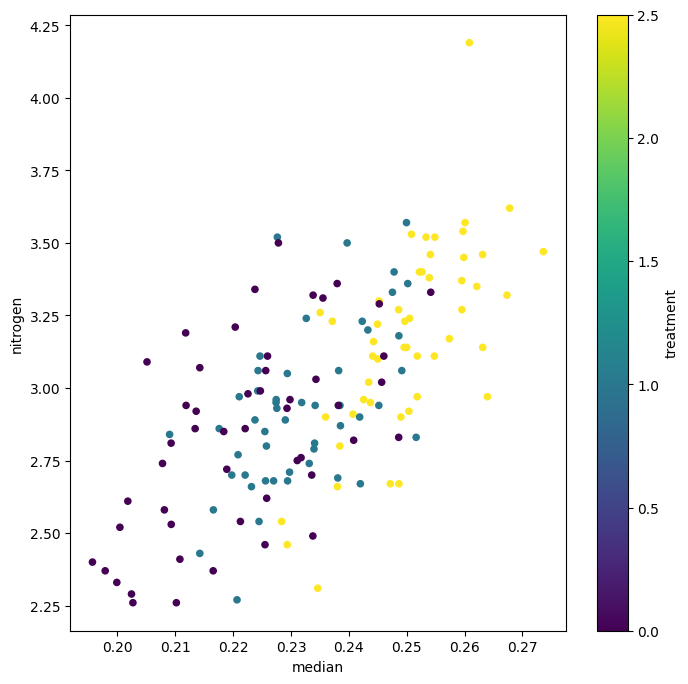

In [34]:
# write your code here to plot scatter plot (5  points)
df_ndre['treatment'].replace(to_replace=['0X', '1X', '2.5X'], value=[0, 1, 2.5], inplace=True)
df_ndre.plot.scatter('median', 'nitrogen', c='treatment', colormap='viridis', figsize = (8,8))

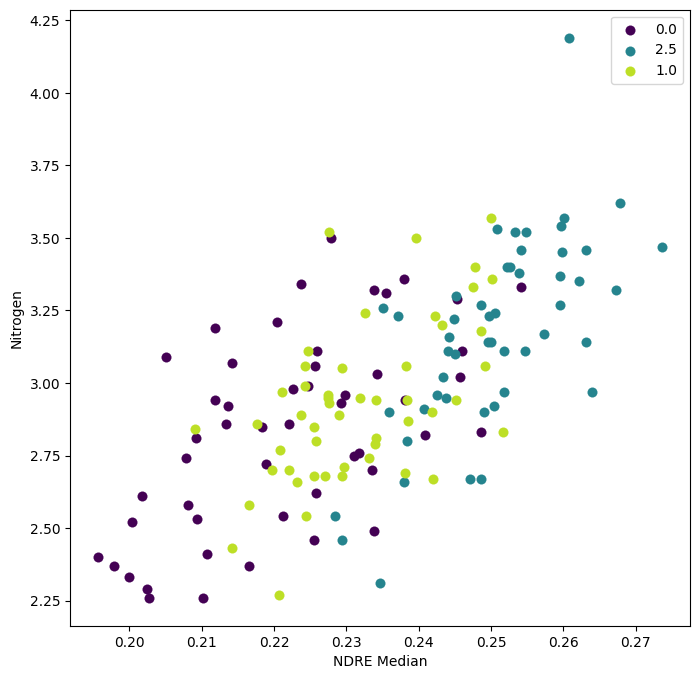

In [35]:
# or alternatively

import matplotlib.cm as cm
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize = (8,8))

# get colormap for viridis
colormap = cm.viridis

# select three colors, evenly spaced out, from the colormap (which goes from purple, teal, to lime green)
# yields a list of three hex colors
colorlist = [colors.rgb2hex(colormap(i)) for i in
             np.linspace(0, 0.9, len(df_ndre['treatment'].unique()))]

# or just hardcode colorlist:
# colorlist = ['#1F77B4', '#D62728', '#2CA02C']

# go through each color and build a scatter for each treatment
for i, c in enumerate(colorlist):

  # obtain the treatment
  trt = df_ndre['treatment'].unique()[i]

  # get all the nitrogen values for this treatment/color
  x = df_ndre['median'].loc[df_ndre['treatment'] == trt]
  # get all median values for this treatment/color
  y = df_ndre['nitrogen'].loc[df_ndre['treatment'] == trt]

  # produce scatter plot for just this treatment's data points
  ax.scatter(x,
             y,
             label = trt,
             s = 50,
             linewidth = 0.1,
             c = c)

ax.legend()
plt.xlabel("NDRE Median")
plt.ylabel("Nitrogen")
plt.show()

<a name="section_submit"></a>
## **How to Submit Homework 8**

Once you have finished writing your code, follow the steps below to submit your assignment.

### Step 1: Run the Entire Notebook
- Run all code cells to make sure your notebook works correctly and displays all results.
- To do this, go to the **Runtime** tab and click **Run all**.

### Step 2: Check Your Work
- Make sure you followed all instructions.
- Confirm that you answered all questions and that the outputs look correct.

### Step 3: Rename and Save the Notebook
- Click on the notebook name at the **top left** of the page.
- The default name is:  
  `ABT182_hw8.ipynb`
- Rename the file by replacing **ABT182** with your own name.

  **Example:**  
  `ali_moghimi_hw8.ipynb`

- Save the notebook after renaming.

### Step 4: Create PDF Version
- Creating a PDF version of your notebook is **required**.
- To create a PDF:
  1. Go to the **File** tab (top left).
  2. Select **Print** (or press `Ctrl + P` / `Cmd + P`).
  3. In the print window, change the **Destination** to **Save as PDF** or **Adobe PDF**.
  4. Click **Print** to save the PDF file.
- Alternatively: **File** → **Download** → **Download .pdf**

### Step 5: Submit Both Files to Canvas
- **Upload BOTH files** to the **Canvas page** for this assignment:
  1. The renamed notebook file (`.ipynb` file) - **REQUIRED**
  2. The PDF file (`.pdf` file) - **REQUIRED**
- Make sure both files are uploaded before submitting.

### Use of Generative AI Tools (GenAI Policy)
- This course **discourages the use of generative AI tools** (such as ChatGPT) for completing assignments, as the goal is for you to develop your own coding skills.
- If you **do choose to use a generative AI tool**, you must **clearly disclose** this in your notebook.
- In your disclosure, briefly explain:
  - which tool you used, and  
  - how you used it (e.g., debugging, understanding error messages, or clarifying concepts).
- Failure to disclose the use of generative AI tools may be considered a violation of course academic integrity policies.